Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Training Data

In [2]:
train_base_dir = 'train'

classes = ['fire', 'nofire']

fire_file_paths = []
nofire_file_paths = []

for class_name in classes:
    class_dir = os.path.join(train_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_file_paths.extend(file_paths)

Importing the Testing Data

In [3]:
test_base_dir = 'test'

classes = ['fire', 'nofire']

fire_test_file_paths = []
nofire_test_file_paths = []

for class_name in classes:
    class_dir = os.path.join(test_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_test_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_test_file_paths.extend(file_paths)

Importing the Validation Data

In [4]:
val_base_dir = 'val'

classes = ['fire', 'nofire']

fire_test_file_paths = []
nofire_test_file_paths = []

for class_name in classes:
    class_dir = os.path.join(val_base_dir, class_name)
    
    if class_name == 'fire':
        fire_subclasses = ['Both_smoke_and_fire', 'Smoke_from_fires']
        for subclass_name in fire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            fire_test_file_paths.extend(file_paths)
    
    elif class_name == 'nofire':
        nofire_subclasses = ['Smoke_confounding_elements', 'Forested_areas_without_confounding_elements', 'Fire_confounding_elements']
        for subclass_name in nofire_subclasses:
            subclass_dir = os.path.join(class_dir, subclass_name)
            file_paths = [os.path.join(subclass_dir, file) for file in os.listdir(subclass_dir)]
            nofire_test_file_paths.extend(file_paths)

Importing the Pretrained CNN-20 Epochs

In [5]:
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in pretrained_model.layers:
    layer.trainable = False

x = Flatten()(pretrained_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=pretrained_model.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



58889256/58889256 [==============================] - 1s 0us/step

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                           

Image Generator

In [6]:
data_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

val_generator = data_gen.flow_from_directory(
    'val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


Compile and Train Model-20 Epochs

In [7]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

model.save('pretrainedCNN.h5')

Epoch 1/20


34/59 [================>.............] - ETA: 1:55 - loss: 0.5845 - accuracy: 0.7176

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


53/59 [=========================>....] - ETA: 27s - loss: 0.5350 - accuracy: 0.7410

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 [==============================] - 334s 6s/step - loss: 0.5306 - accuracy: 0.7430 - val_loss: 0.4550 - val_accuracy: 0.7736
Epoch 2/20
59/59 [==============================] - 324s 5s/step - loss: 0.4106 - accuracy: 0.8082 - val_loss: 0.4472 - val_accuracy: 0.7910
Epoch 3/20
59/59 [==============================] - 321s 5s/step - loss: 0.3887 - accuracy: 0.8151 - val_loss: 0.4042 - val_accuracy: 0.8184
Epoch 4/20
59/59 [==============================] - 322s 5s/step - loss: 0.3789 - accuracy: 0.8193 - val_loss: 0.4297 - val_accuracy: 0.8333
Epoch 5/20
59/59 [==============================] - 322s 5s/step - loss: 0.3488 - accuracy: 0.8421 - val_loss: 0.4456 - val_accuracy: 0.8035
Epoch 6/20
59/59 [==============================] - 320s 5s/step - loss: 0.3585 - accuracy: 0.8421 - val_loss: 0.4253 - val_accuracy: 0.8010
Epoch 7/20
59/59 [==============================] - 322s 5s/step - loss: 0.3349 - accuracy: 0.8532 - val_loss: 0.4324 - val_accuracy: 0.8159
Epoch 8/20
59/59 [======

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the Model-20 Epochs

In [8]:
model = keras.models.load_model('pretrainedCNN.h5')

test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_data_gen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_pred = model.predict(test_generator)
test_labels = test_generator.classes 

test_predictions = (test_pred > 0.5).astype(int)

test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions)
test_f1_score = f1_score(test_labels, test_predictions)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test precision: {test_precision:.2f}')
print(f'Test recall: {test_recall:.2f}')
print(f'Test F1 Score: {test_f1_score:.2f}')

Found 410 images belonging to 2 classes.


 4/13 [========>.....................] - ETA: 26s

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 7/13 [===============>..............] - ETA: 21s

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/13 [======================>.......] - ETA: 13s

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 [==============================] - 61s 5s/step
Test accuracy: 88.54%
Test precision: 0.90
Test recall: 0.92
Test F1 Score: 0.91


Plotting Training and Validation Loss-20 Epochs

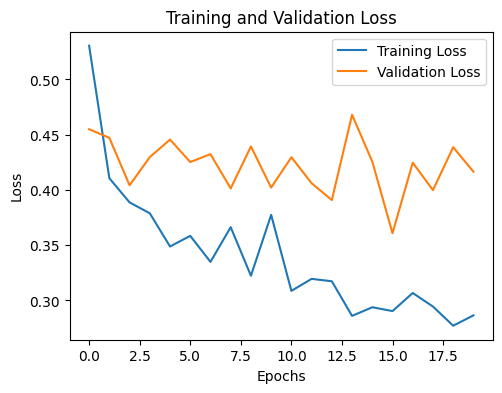

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Plotting Accuracy-20 Epochs

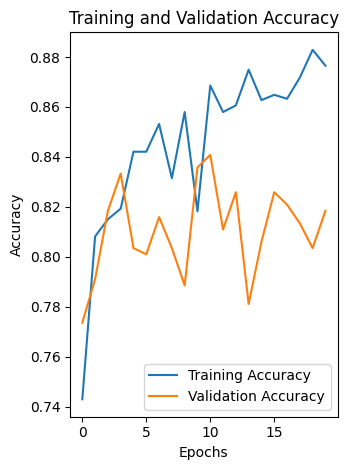

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

Confusion Matrix-20 Epochs

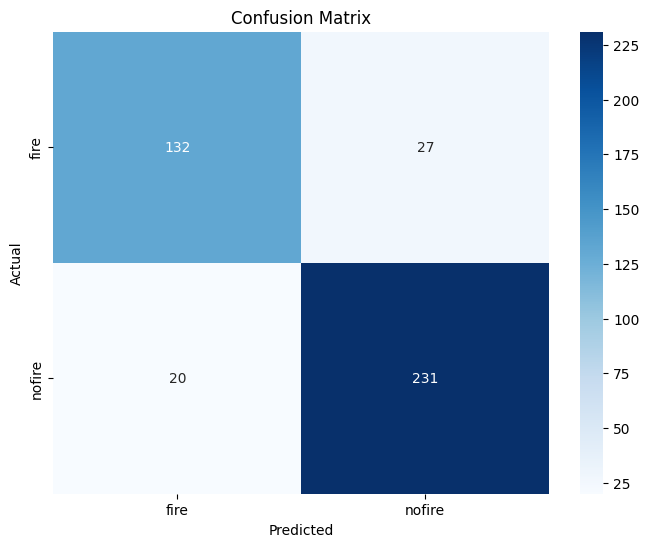

In [11]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Importing the Pretrained CNN-3 Epochs

In [12]:
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in pretrained_model.layers:
    layer.trainable = False

x = Flatten()(pretrained_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs=pretrained_model.input, outputs=output)

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

Compile and Train Model-20 Epochs

In [13]:
history1 = model1.fit(train_generator, epochs=3, validation_data=val_generator)

model1.save('pretrainedCNN3Epochs.h5')

Epoch 1/3
49/59 [=======================>......] - ETA: 46s - loss: 0.5754 - accuracy: 0.7435

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


54/59 [==========================>...] - ETA: 23s - loss: 0.5562 - accuracy: 0.7522

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 [==============================] - 343s 6s/step - loss: 0.5545 - accuracy: 0.7552 - val_loss: 0.5512 - val_accuracy: 0.7363
Epoch 2/3
59/59 [==============================] - 382s 6s/step - loss: 0.4435 - accuracy: 0.7843 - val_loss: 0.5131 - val_accuracy: 0.7786
Epoch 3/3
59/59 [==============================] - 394s 7s/step - loss: 0.3966 - accuracy: 0.8156 - val_loss: 0.4597 - val_accuracy: 0.7562


C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the Model-3 Epochs

In [18]:
model1 = keras.models.load_model('pretrainedCNN3Epochs.h5')

test_data_gen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_data_gen.flow_from_directory(
    'test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_pred = model1.predict(test_generator)
test_labels = test_generator.classes 

test_predictions = (test_pred > 0.5).astype(int)

test_accuracy = accuracy_score(test_labels, test_predictions)
test_precision = precision_score(test_labels, test_predictions)
test_recall = recall_score(test_labels, test_predictions)
test_f1_score = f1_score(test_labels, test_predictions)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test precision: {test_precision:.2f}')
print(f'Test recall: {test_recall:.2f}')
print(f'Test F1 Score: {test_f1_score:.2f}')

Found 410 images belonging to 2 classes.
 4/13 [========>.....................] - ETA: 33s

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 7/13 [===============>..............] - ETA: 27s

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/13 [======================>.......] - ETA: 16s

C:\Users\Cole\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 [==============================] - 77s 6s/step
Test accuracy: 86.34%
Test precision: 0.93
Test recall: 0.84
Test F1 Score: 0.88


Plotting Training and Validation Loss-3 Epochs

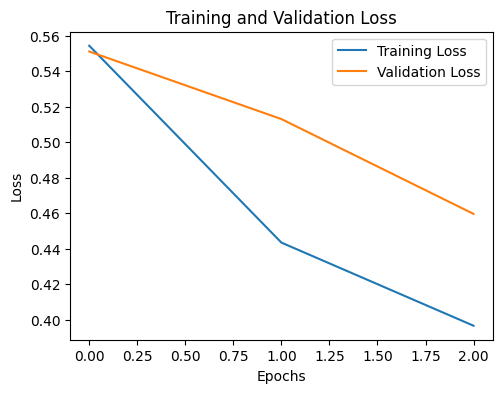

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Plotting Accuracy-3 Epochs

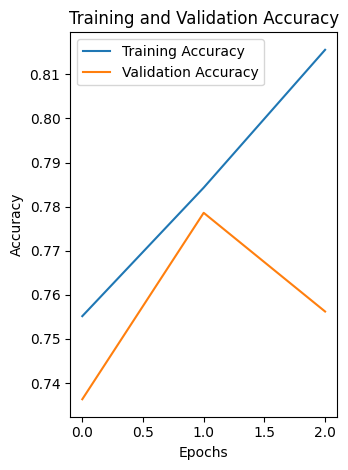

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

Confusion Matrix-3 Epochs

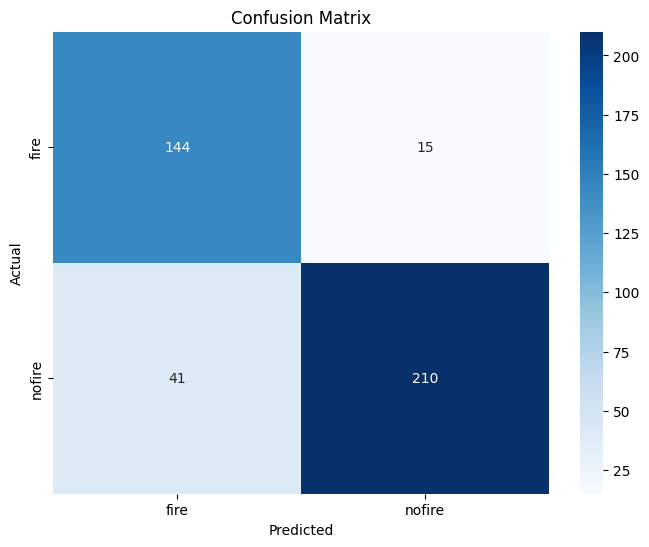

In [21]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()